In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [3]:
dataset = pd.read_csv('GSPC.csv')

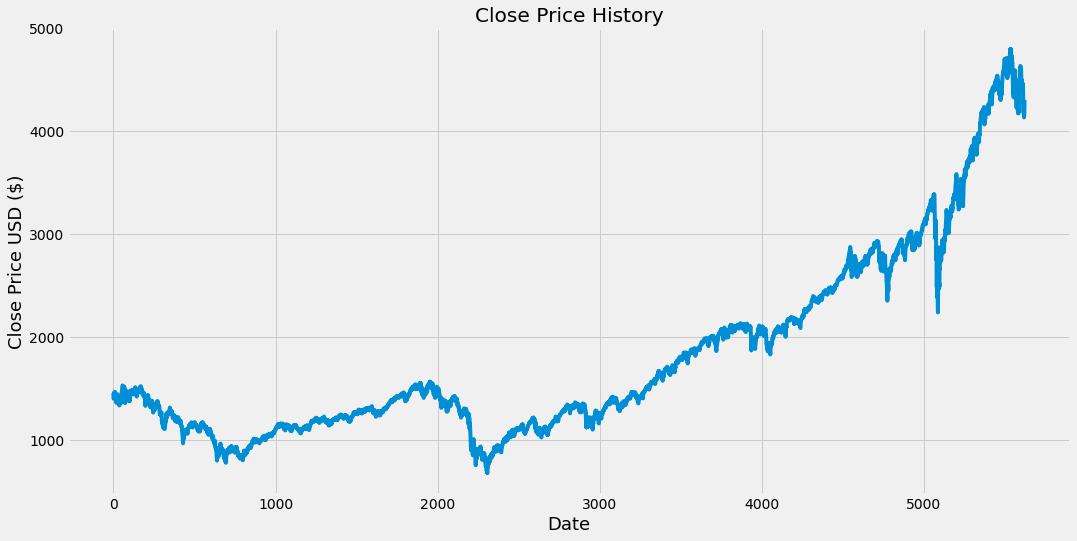

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dataset['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
data = dataset.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

4497

In [6]:
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.18900104],
       [0.17545746],
       [0.17611036],
       ...,
       [0.84437488],
       [0.84925351],
       [0.87951784]])

In [8]:
train_data = scaled_data[0:training_data_len  , : ]
#Spliting the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.18900104, 0.17545746, 0.17611036, 0.17643559, 0.18566368,
       0.1895787 , 0.1849574 , 0.18342584, 0.18765641, 0.19141123,
       0.18898163, 0.1891661 , 0.18665881, 0.18563699, 0.17596959,
       0.17803268, 0.17659093, 0.17524873, 0.1659284 , 0.17425357,
       0.17785065, 0.1778118 , 0.18165886, 0.18151323, 0.18148168,
       0.18572436, 0.17844043, 0.17968314, 0.17247204, 0.17315648,
       0.17609581, 0.17260554, 0.17274874, 0.16251336, 0.1639891 ,
       0.16605702, 0.16429492, 0.15942358, 0.16298911, 0.16744781,
       0.17054728, 0.17117108, 0.17782395, 0.17348175, 0.16482646,
       0.16751575, 0.1760084 , 0.17440162, 0.17162253, 0.16568326,
       0.17369048, 0.18978986, 0.19124616, 0.18934327, 0.19838204,
       0.20002524, 0.20650819, 0.20653489, 0.20566111, 0.20174609])]
[0.20193784616088406]

[array([0.18900104, 0.17545746, 0.17611036, 0.17643559, 0.18566368,
       0.1895787 , 0.1849574 , 0.18342584, 0.18765641, 0.19141123,
       0.18898163, 0.1891661 , 0.18

In [9]:
#Here we are Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [11]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

4437/4437 [==============================] - 110s 25ms/step - loss: 1.2755e-04


In [15]:
test_data = scaled_data[training_data_len - 60: , : ]
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [16]:
x_test = np.array(x_test)


In [17]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [18]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [19]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

173.57865382663067

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


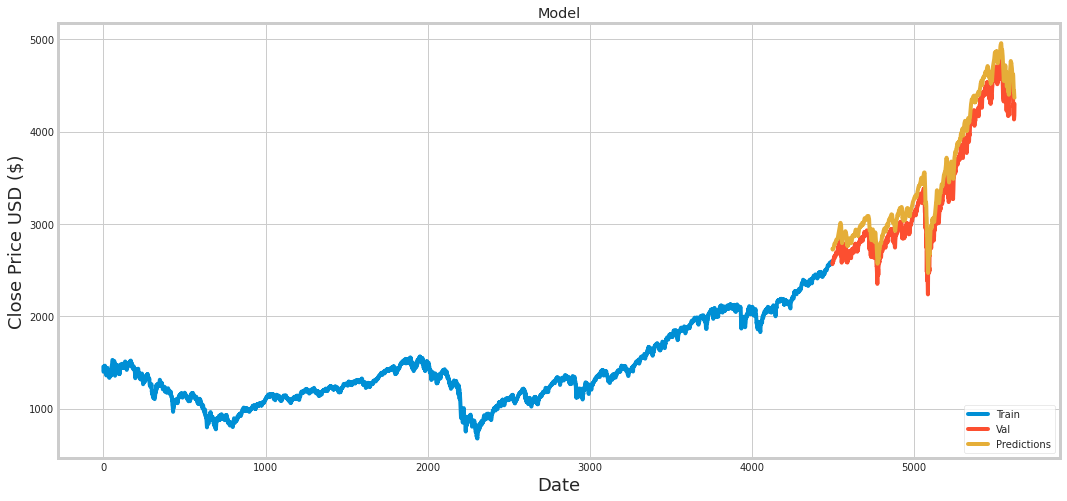

In [20]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
print(valid)

            Close  Predictions
4497  2564.620117  2730.510742
4498  2585.639893  2723.410400
4499  2578.850098  2726.252197
4500  2582.139893  2726.006836
4501  2599.030029  2727.052002
...           ...          ...
5616  4287.500000  4426.693359
5617  4131.930176  4440.799316
5618  4155.379883  4394.857910
5619  4175.479980  4373.753418
5620  4300.169922  4367.811523

[1124 rows x 2 columns]
